# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
## Open Weather Map's Current Weather API call requires latitude and longtitude.  The API documentation noted that
## this needs to be done through the "Direct Geocoding" API.

## Create a list to store all the CityLtLg dictionary into
CityLLDict_list = []

## Create a dictionary to populate the latitude and longditude of each city
CityLtLg_Dict = {}

## Create counter
RecSuccess = 1
Rec = 1
Set = 1

## Start for loop to create a dictionary for each city
for city in cities:
    if Rec == 1:
        print("Beginning Data Retrieval")
        print("-----------------------------")
        
        try:
            response = requests.get(f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}")
            CLL_Resp = response.json()

            ## Populate to dictionary
            CityLtLg_Dict["City"]=city
            CityLtLg_Dict["Lat"]=CLL_Resp[0]['lat']
            CityLtLg_Dict["Lng"]=CLL_Resp[0]['lon']

            ## Create lat and long variable for next lookup
            Lat = CLL_Resp[0]['lat']
            Lng = CLL_Resp[0]['lon']

            ## Call response for weather details of each city
            response2 = requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={Lat}&lon={Lng}&units=metric&appid={weather_api_key}")
            CLL_Resp2 = response2.json()

            ## Populate to dictionary
            CityLtLg_Dict["Max Temp"]=CLL_Resp2['main']['temp_max']
            CityLtLg_Dict["Humidity"]=CLL_Resp2['main']['humidity']
            CityLtLg_Dict["Cloudiness"]=CLL_Resp2['clouds']["all"]
            CityLtLg_Dict["Wind Speed"]=CLL_Resp2['wind']["speed"]
            CityLtLg_Dict["Country"]=CLL_Resp2['sys']["country"]
            CityLtLg_Dict["Date"]=CLL_Resp2['dt']

            ## Append to CityLLDict_list and clear dictionary ready for thex loop
            CityLLDict_list.append(CityLtLg_Dict)
            CityLtLg_Dict = {}

            ##Log successfull record
            print(f"Processing Record {RecSuccess} of Set {Set} | {city}")
            RecSuccess = RecSuccess+1
            if Rec == len(cities):
                print("-----------------------------")
                print("Data Retrieval Complete")    
                print("-----------------------------")
            else:
                Rec = Rec + 1


        except:
            print(f"City '{city}' not found. Skipping...")
            if Rec == len(cities):
                print("-----------------------------")
                print("Data Retrieval Complete")    
                print("-----------------------------")
            else:
                Rec = Rec + 1
    else:
        try:
            response = requests.get(f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}")
            CLL_Resp = response.json()
    
            ## Populate to dictionary
            CityLtLg_Dict["City"]=city
            CityLtLg_Dict["Lat"]=CLL_Resp[0]['lat']
            CityLtLg_Dict["Lng"]=CLL_Resp[0]['lon']

            ## Create lat and long variable for next lookup
            Lat = CLL_Resp[0]['lat']
            Lng = CLL_Resp[0]['lon']

            ## Call response for weather details of each city
            response2 = requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={Lat}&lon={Lng}&units=metric&appid={weather_api_key}")
            CLL_Resp2 = response2.json()

            ## Populate to dictionary
            CityLtLg_Dict["Max Temp"]=CLL_Resp2['main']['temp_max']
            CityLtLg_Dict["Humidity"]=CLL_Resp2['main']['humidity']
            CityLtLg_Dict["Cloudiness"]=CLL_Resp2['clouds']["all"]
            CityLtLg_Dict["Wind Speed"]=CLL_Resp2['wind']["speed"]
            CityLtLg_Dict["Country"]=CLL_Resp2['sys']["country"]
            CityLtLg_Dict["Date"]=CLL_Resp2['dt']


            ## Append to CityLLDict_list and clear dictionary ready for thex loop
            CityLLDict_list.append(CityLtLg_Dict)
            CityLtLg_Dict = {}

            ##Log successfull record
            print(f"Processing Record {RecSuccess} of Set {Set} | {city}")
            RecSuccess = RecSuccess+1
            if Rec == len(cities):
                print("-----------------------------")
                print("Data Retrieval Complete")    
                print("-----------------------------")
            else:
                Rec = Rec + 1
                
        except:
            print(f"City '{city}' not found. Skipping...")
            if Rec == len(cities):
                print("-----------------------------")
                print("Data Retrieval Complete")    
                print("-----------------------------")
            else:
                Rec = Rec + 1


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | escanaba
Processing Record 2 of Set 1 | dryden
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | yeppoon
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | muros
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | khandbari
Processing Record 13 of Set 1 | mys shmidta
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | buzmeyin
Processing Record 18 of Set 1 | illoqqortoormiut
Processing Record 19 of Set 1 | comodoro rivadavia
Processing Record 20 of Set 1 | hoquiam
Processing Record 21 of Set 1 | camacupa
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | 

Processing Record 188 of Set 1 | erzin
Processing Record 189 of Set 1 | nantucket
Processing Record 190 of Set 1 | aitape
Processing Record 191 of Set 1 | dingle
Processing Record 192 of Set 1 | ostrovnoy
Processing Record 193 of Set 1 | tautira
Processing Record 194 of Set 1 | aden
Processing Record 195 of Set 1 | nguiu
Processing Record 196 of Set 1 | palmer
Processing Record 197 of Set 1 | pietrosani
Processing Record 198 of Set 1 | yaitepec
Processing Record 199 of Set 1 | sistranda
Processing Record 200 of Set 1 | beloha
Processing Record 201 of Set 1 | huazolotitlan
Processing Record 202 of Set 1 | domalandan
Processing Record 203 of Set 1 | ambon
Processing Record 204 of Set 1 | kushiro
Processing Record 205 of Set 1 | hasanabad
Processing Record 206 of Set 1 | wuwei
Processing Record 207 of Set 1 | port lincoln
Processing Record 208 of Set 1 | veraval
Processing Record 209 of Set 1 | bara
Processing Record 210 of Set 1 | saltillo
Processing Record 211 of Set 1 | imbituba
City '

Processing Record 376 of Set 1 | muli
Processing Record 377 of Set 1 | upata
Processing Record 378 of Set 1 | melita
City 'yar-sale' not found. Skipping...
Processing Record 379 of Set 1 | nadym
Processing Record 380 of Set 1 | odweyne
Processing Record 381 of Set 1 | attawapiskat
Processing Record 382 of Set 1 | pagudpud
Processing Record 383 of Set 1 | tessalit
Processing Record 384 of Set 1 | gari
Processing Record 385 of Set 1 | thompson
Processing Record 386 of Set 1 | kaeo
Processing Record 387 of Set 1 | isangel
Processing Record 388 of Set 1 | quatre cocos
Processing Record 389 of Set 1 | jevnaker
Processing Record 390 of Set 1 | bolshaya dzhalga
Processing Record 391 of Set 1 | hornepayne
Processing Record 392 of Set 1 | rancho palos verdes
Processing Record 393 of Set 1 | sumbawa
Processing Record 394 of Set 1 | nhulunbuy
Processing Record 395 of Set 1 | okhotsk
Processing Record 396 of Set 1 | nangomba
Processing Record 397 of Set 1 | alexandria
Processing Record 398 of Set 

Processing Record 563 of Set 1 | tonj
Processing Record 564 of Set 1 | lapa
Processing Record 565 of Set 1 | oussouye
Processing Record 566 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 567 of Set 1 | kulu
Processing Record 568 of Set 1 | tall kayf
Processing Record 569 of Set 1 | kastornoye
Processing Record 570 of Set 1 | amazar
Processing Record 571 of Set 1 | kempele
Processing Record 572 of Set 1 | babstovo
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
from datetime import date
today = date.today()
CurrentDate = today.strftime("%d/%m/%Y")
CurrentDateFL = today.strftime("%Y%m%d")

## Convert the List of Dictionaries created into a Data Frame
CityWeather_df = pd.DataFrame(CityLLDict_list)

## Export data into csv to the "output_data" folder
CityWeather_df.to_csv(f'output_data\CitiesCurrentWeather{CurrentDateFL}.csv', index = False)

## Display DataFrame
CityWeather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,escanaba,45.745571,-87.064743,1.09,93,20,2.57,US,1647611651
1,dryden,42.490905,-76.297155,16.05,76,0,1.54,US,1647611652
2,rikitea,-23.122954,-134.968014,26.55,80,13,5.10,PF,1647611653
3,yeppoon,-23.134804,150.743662,24.01,75,97,7.61,AU,1647611654
4,georgetown,6.813743,-58.162447,28.16,82,64,4.43,GY,1647611654


In [11]:
## Create a statistical summary table of the DataFrame results
# Define Percentile
perc = [.25,.50,.75]

# List of dtypes to include
include =['object', 'float', 'int']

# Calling describe method
CWStatSumm = CityWeather_df.describe(percentiles = perc, include = include)
CWStatSumm.to_csv(f'output_data\CWStatSumm{CurrentDateFL}.csv', index = False)
# Display summary
CWStatSumm

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,572,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572,5.720000e+02
unique,572,NaN,NaN,NaN,NaN,NaN,NaN,125,NaN
top,escanaba,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN
mean,NaN,22.736017,14.295931,13.394668,70.454545,57.496503,3.863951,NaN,1.647612e+09
std,NaN,32.283340,89.670405,15.490506,23.175483,40.569738,2.851869,NaN,1.382390e+02
min,NaN,-54.806116,-179.413096,-30.980000,1.000000,0.000000,0.000000,NaN,1.647612e+09
25%,NaN,-3.251822,-64.340994,2.787500,59.000000,12.750000,1.770000,NaN,1.647612e+09
50%,NaN,28.220299,18.826754,16.315000,75.000000,73.500000,3.185000,NaN,1.647612e+09
75%,NaN,48.426262,85.098535,26.360000,89.000000,100.000000,5.360000,NaN,1.647612e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
## According to the CWStatSumm there are no cities where the max "Humidity" column exceeds 100%.
## This step, therefore, is skipped.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

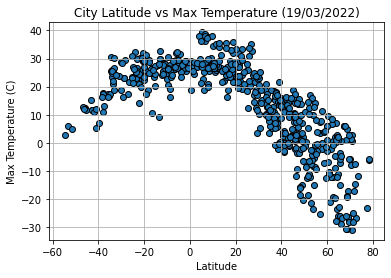

In [6]:
plt.title(f"City Latitude vs Max Temperature ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

plt.scatter(CityWeather_df["Lat"],CityWeather_df["Max Temp"], marker = "o", edgecolor = "black")
plt.savefig(f'output_data\LatVsTemp{CurrentDateFL}')
plt.show()

## Latitude vs. Humidity Plot

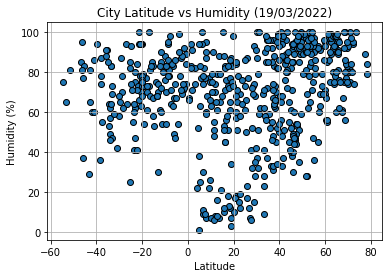

In [7]:
plt.title(f"City Latitude vs Humidity ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.scatter(CityWeather_df["Lat"],CityWeather_df["Humidity"], marker = "o", edgecolor = "black")
plt.savefig(f'output_data\LatVsHumid{CurrentDateFL}')
plt.show()

## Latitude vs. Cloudiness Plot

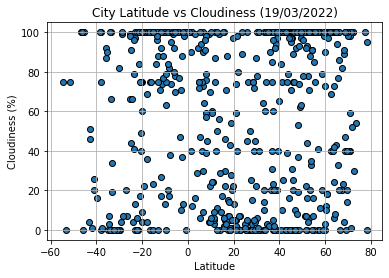

In [8]:
plt.title(f"City Latitude vs Cloudiness ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.scatter(CityWeather_df["Lat"],CityWeather_df["Cloudiness"], marker = "o", edgecolor = "black")
plt.savefig(f'output_data\LatVsCloud{CurrentDateFL}')
plt.show()

## Latitude vs. Wind Speed Plot

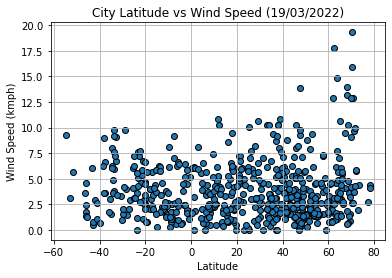

In [9]:
plt.title(f"City Latitude vs Wind Speed ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")
plt.grid()

plt.scatter(CityWeather_df["Lat"],CityWeather_df["Wind Speed"], marker = "o", edgecolor = "black")
plt.savefig(f'output_data\LatVsWind{CurrentDateFL}')
plt.show()

## Linear Regression

In [13]:
## Create a dataframe from Northern and southern hemisphere

#Northern Hemisphere Dataframe
CityWeatherNH_df = CityWeather_df[CityWeather_df.Lat >=0]
CityWeatherNH_df.to_csv(f'output_data\\NHCityData{CurrentDateFL}.csv', index = False)
CityWeatherNH_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,escanaba,45.745571,-87.064743,1.09,93,20,2.57,US,1647611651
1,dryden,42.490905,-76.297155,16.05,76,0,1.54,US,1647611652
4,georgetown,6.813743,-58.162447,28.16,82,64,4.43,GY,1647611654
6,pevek,69.702817,170.274685,-27.45,92,14,4.15,RU,1647611656
7,lompoc,34.639150,-120.457941,10.29,97,100,3.09,US,1647611657


In [14]:
#Northern Hemisphere Dataframe
CityWeatherSH_df = CityWeather_df[CityWeather_df.Lat <0]
CityWeatherSH_df.to_csv(f"output_data\\SHCityData{CurrentDateFL}.csv",index=False)
CityWeatherSH_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,rikitea,-23.122954,-134.968014,26.55,80,13,5.10,PF,1647611653
3,yeppoon,-23.134804,150.743662,24.01,75,97,7.61,AU,1647611654
5,punta arenas,-53.162569,-70.907822,6.16,65,0,3.09,CL,1647611655
8,mount gambier,-37.824670,140.782007,11.11,87,0,3.60,AU,1647611657
15,puerto ayora,-0.747167,-90.313420,27.33,74,0,1.84,EC,1647611663


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: 0.7279009341414238


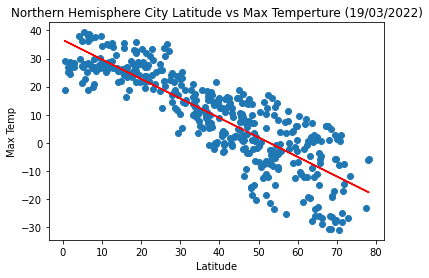

In [15]:
x_values = CityWeatherNH_df['Lat']
y_values = CityWeatherNH_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere City Latitude vs Max Temperture ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data\\NHLatVsMaxTemp{CurrentDateFL}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: 0.4556956880780505


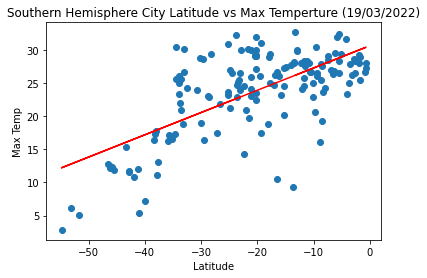

In [16]:
x_values = CityWeatherSH_df['Lat']
y_values = CityWeatherSH_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere City Latitude vs Max Temperture ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data\\SHLatVsMaxTemp{CurrentDateFL}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.16243249260534756


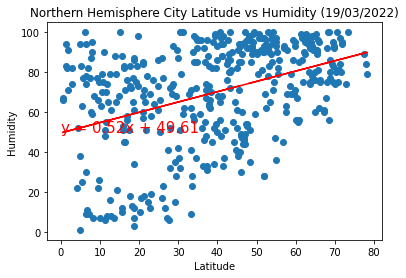

In [17]:
x_values = CityWeatherNH_df['Lat']
y_values = CityWeatherNH_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere City Latitude vs Humidity ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data\\NHLatVsHumidity{CurrentDateFL}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.024196289330739418


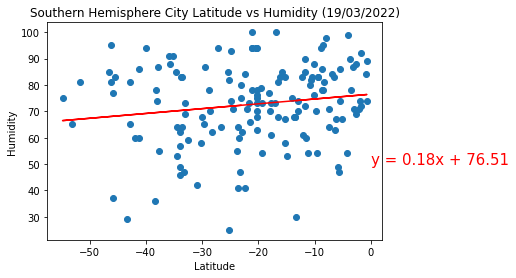

In [18]:
x_values = CityWeatherSH_df['Lat']
y_values = CityWeatherSH_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere City Latitude vs Humidity ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data\\SHLatVsHumidity{CurrentDateFL}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.04474972560399036


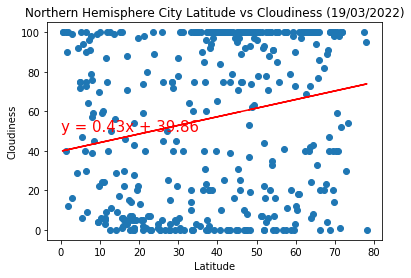

In [19]:
x_values = CityWeatherNH_df['Lat']
y_values = CityWeatherNH_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere City Latitude vs Cloudiness ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data\\NHLatVsCloudiness{CurrentDateFL}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.06445401901484402


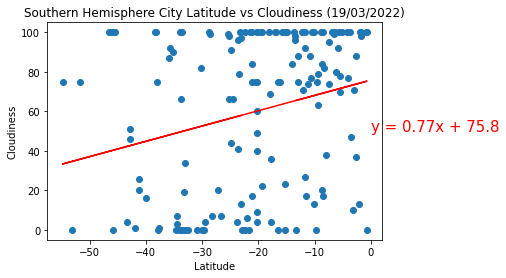

In [20]:
x_values = CityWeatherSH_df['Lat']
y_values = CityWeatherSH_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere City Latitude vs Cloudiness ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data\\SHLatVsCloudiness{CurrentDateFL}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: 0.01651354391699589


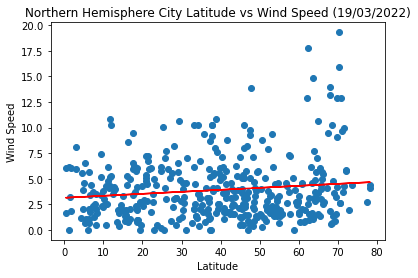

In [21]:
x_values = CityWeatherNH_df['Lat']
y_values = CityWeatherNH_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere City Latitude vs Wind Speed ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data\\NHLatVsWind{CurrentDateFL}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: 0.03192802043010971


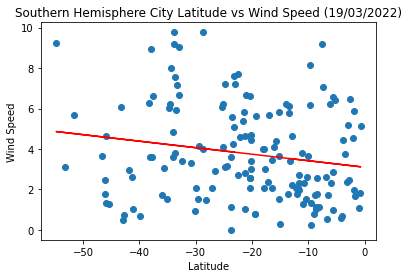

In [22]:
x_values = CityWeatherSH_df['Lat']
y_values = CityWeatherSH_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere City Latitude vs Wind Speed ({CurrentDate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data\\SHLatVsWind{CurrentDateFL}")
plt.show()

# Three observables trends

1. There is a strong positive correlation between the southern hemisphere's max temperature vs latitude
2. There is a strong negative correlation between the northern hemisphere's max temperature vs latitude
3. There is weak correlations observed between southern or northern hemisphere's windspeed vs latitude

Conclusion:
The closer you are to the equator, the more likely that you will experience a higher Max Temperature.
Latitude does not impact wind speed.